In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

### Reading the data

In [17]:
df = pd.read_csv("winequality-white.csv", delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Exploratory visual analysis

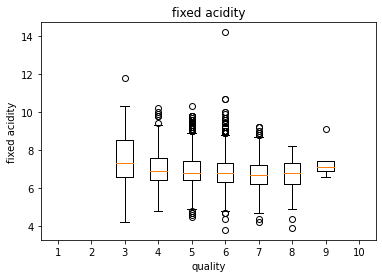

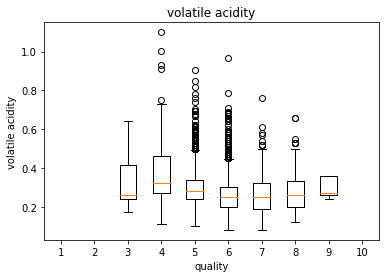

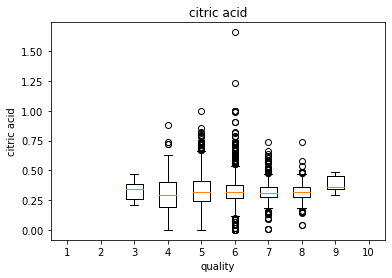

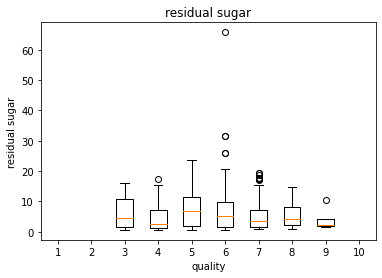

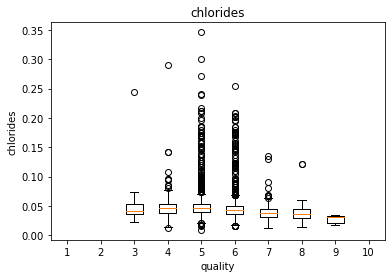

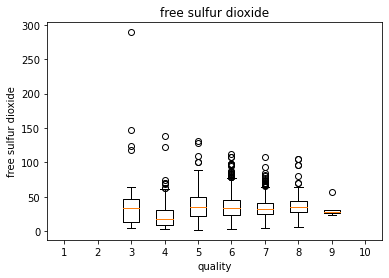

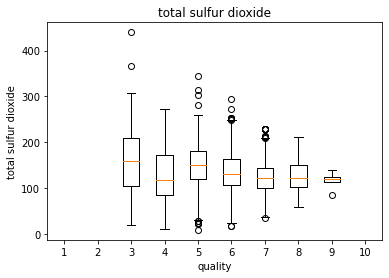

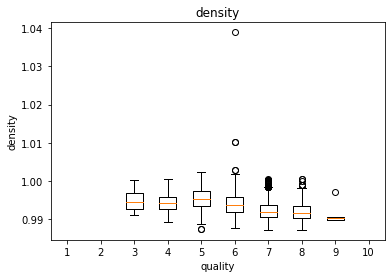

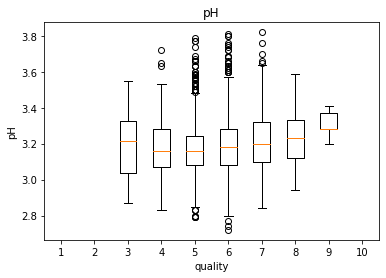

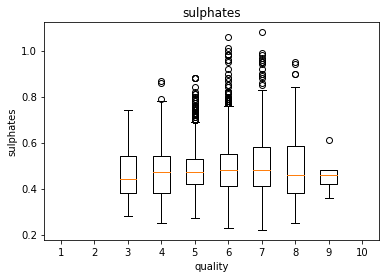

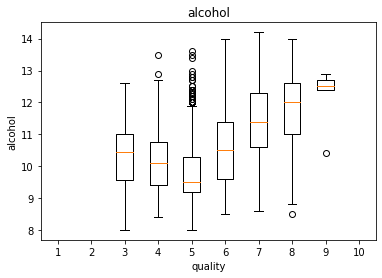

In [18]:
for label in df.columns [:-1]:
    plt.boxplot([df[df['quality']==i][label] for i in range (1, 11)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig('imgs/'+'white'.join(label.split(' ')))
    plt.show()

### Gathering training and testing data

Quality is currently a score /10 with all entries ranging from 0 to 9. We have not however defined what we would consider good/ok/bad wine so lets map these to low(0), mid(1), and high(1) quality wines.


In [19]:
bins = [0, 5.5, 7.5, 10] #these are the bounds for low, mid, and high quality wines
labels = [0, 1, 2] #i.e. this means 3-35 are low, 6-7 are mod, and 8,9 are high
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [23]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2, random_state = 42) #20% test siz, 80% train size

In [24]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


Now we have around 4000 entries in training data, and 1000 entires in test data.

### K Nearest Neighbors Classifier

In [34]:
# 3 nearest neighbour

n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print("Cross validaion score:",cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

Cross validaion score: 0.7292016806722689


In [36]:
# 5 nearest neighbour

n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n3.predict(x_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print("Cross validaion score:",cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

Cross validaion score: 0.7225618508272874


### Random Forest Classifier

In [40]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print("Cross validaion score:",cross_val.mean())

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.83       980
   macro avg       0.88      0.69      0.74       980
weighted avg       0.83      0.83      0.83       980

Cross validaion score: 0.8044880995876612


### Decision Tree Classifier

In [42]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print("Cross validaion score:",cross_val.mean())

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       321
           1       0.79      0.78      0.79       624
           2       0.34      0.51      0.41        35

    accuracy                           0.72       980
   macro avg       0.60      0.64      0.61       980
weighted avg       0.73      0.72      0.73       980

Cross validaion score: 0.737874497625137


### Stochastic Gradient Descent

In [45]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print("Cross validaion score:", cross_val.mean())

C:\Users\callu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.68      0.43      0.52       321
           1       0.72      0.90      0.80       624
           2       0.00      0.00      0.00        35

    accuracy                           0.71       980
   macro avg       0.47      0.44      0.44       980
weighted avg       0.68      0.71      0.68       980

Cross validaion score: 0.6927031682238113


### Trying to improve results

As a random forest seems to be the best model at this stage, we are going to attempt to optimise the parameters of this model.

In [49]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]

#min number of samples required to split a node
min_samples_split = [2, 5, 10]

#min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#method of selecting samples for training each tree
bootstrap = [True, False]

#random grid
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
               'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap
              }

rf_optimized = RandomizedSearchCV(estimator = rf,
                                  param_distributions = random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   7.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   6.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   8.4s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   5.3s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   5.9s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_sa

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=98, bootstrap=False, total=   8.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   9.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   9.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   9.0s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=21, bootstrap=True 
[CV]  n_estimat

[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   8.4s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   7.5s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   8.4s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.7s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=50, mi

[CV]  n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   2.7s
[CV] n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   2.8s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.5s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.5s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_s

[CV]  n_estimators=788, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=54, bootstrap=True, total=   6.4s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   3.9s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   3.9s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   3.9s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_sam

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=  10.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   9.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   9.9s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False, total=   3.6s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=366,

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.5s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.5s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   1.6s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   1.7s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_

[CV]  n_estimators=261, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=32, bootstrap=True, total=   1.8s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   6.8s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   6.7s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   6.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimators=1000, min_samp

[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   7.1s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   6.9s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   6.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False, total=   9.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=1000, mi

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 25.7min finished


              precision    recall  f1-score   support

           0       0.79      0.72      0.75       321
           1       0.84      0.90      0.87       624
           2       1.00      0.40      0.57        35

    accuracy                           0.82       980
   macro avg       0.87      0.67      0.73       980
weighted avg       0.83      0.82      0.82       980



In [50]:
print(classification_report(y_test, pred_optimizedzedzed))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       321
           1       0.84      0.90      0.87       624
           2       1.00      0.40      0.57        35

    accuracy                           0.82       980
   macro avg       0.87      0.67      0.73       980
weighted avg       0.83      0.82      0.82       980

{'n_estimators': 261, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 98, 'bootstrap': True}


In [53]:
rfeval = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
rfeval.mean()

0.8044861422830001

In [54]:
rf_optimized = RandomForestClassifier(n_estimators=261, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=98, bootstrap=True)
rf_optimized.fit(x_train, y_train)

rfeval = cross_val_score(estimator=rf_optimized, X=x_train, y=y_train, cv=10)
rfeval.mean()

0.8055098126207003